In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [17]:
# Load the dataset
df = pd.read_csv("diabetes.csv")
df.head()
df.describe

<bound method NDFrame.describe of       Unnamed: 0  Age     Sex Ethnicity   BMI  Waist_Circumference  \
0              0   58  Female     White  35.8                 83.4   
1              1   48    Male     Asian  24.1                 71.4   
2              2   34  Female     Black  25.0                113.8   
3              3   62    Male     Asian  32.7                100.4   
4              4   27  Female     Asian  33.5                110.8   
...          ...  ...     ...       ...   ...                  ...   
9995        9995   45  Female     Asian  39.4                114.0   
9996        9996   41  Female     Asian  21.0                 71.3   
9997        9997   50  Female     Asian  29.0                106.3   
9998        9998   62  Female     White  27.3                119.9   
9999        9999   29    Male     Black  20.6                102.0   

      Fasting_Blood_Glucose  HbA1c  Blood_Pressure_Systolic  \
0                     123.9   10.9                      152   

In [29]:
# Check missing values
df.isnull().sum()

# Fill missing numeric values with mean
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype != 'object':
            df.fillna({df[col]:df[col].mean()}, inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Drop unnecessary columns
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Create target column based on Fasting Blood Glucose
df['Diabetes'] = df['Fasting_Blood_Glucose'].apply(lambda x: 1 if x > 125 else 0)

df.isnull().sum()


Age                              0
Sex                              0
Ethnicity                        0
BMI                              0
Waist_Circumference              0
Fasting_Blood_Glucose            0
HbA1c                            0
Blood_Pressure_Systolic          0
Blood_Pressure_Diastolic         0
Cholesterol_Total                0
Cholesterol_HDL                  0
Cholesterol_LDL                  0
GGT                              0
Serum_Urate                      0
Physical_Activity_Level          0
Dietary_Intake_Calories          0
Alcohol_Consumption              0
Smoking_Status                   0
Family_History_of_Diabetes       0
Previous_Gestational_Diabetes    0
Diabetes                         0
dtype: int64

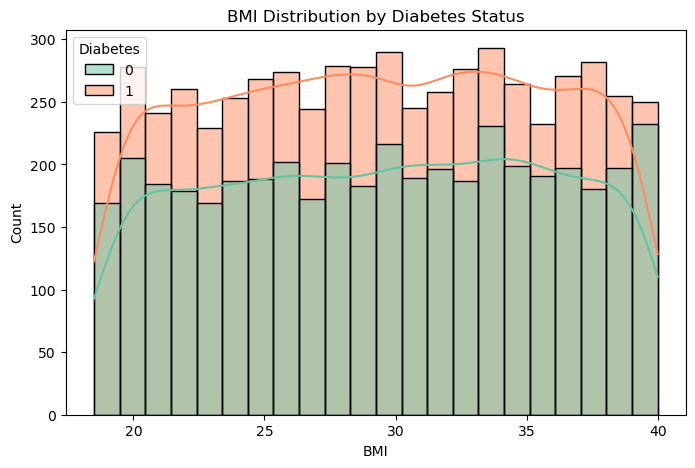

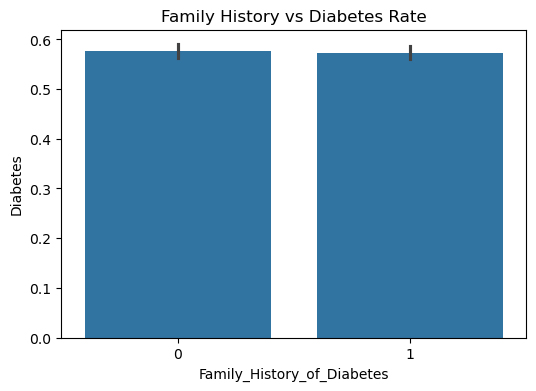

C:\Users\sj945\AppData\Local\Temp\ipykernel_18912\2838268028.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diabetes", y="Fasting_Blood_Glucose", data=df, palette="pastel")


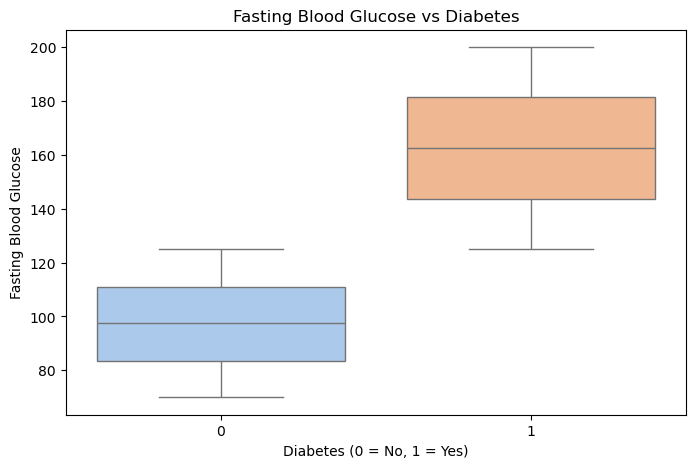

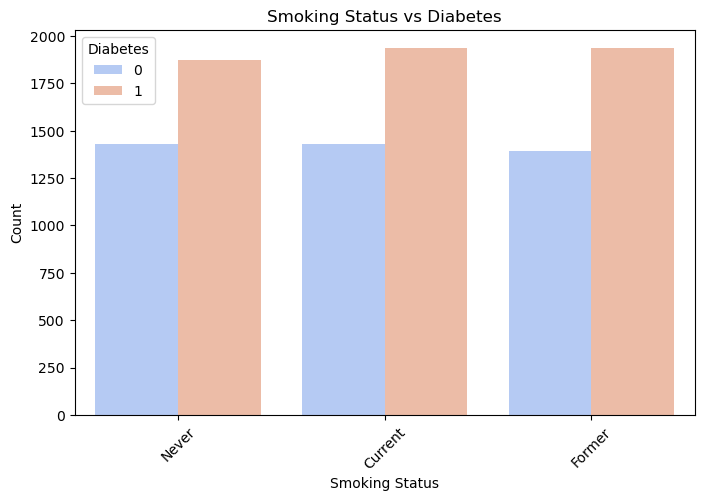

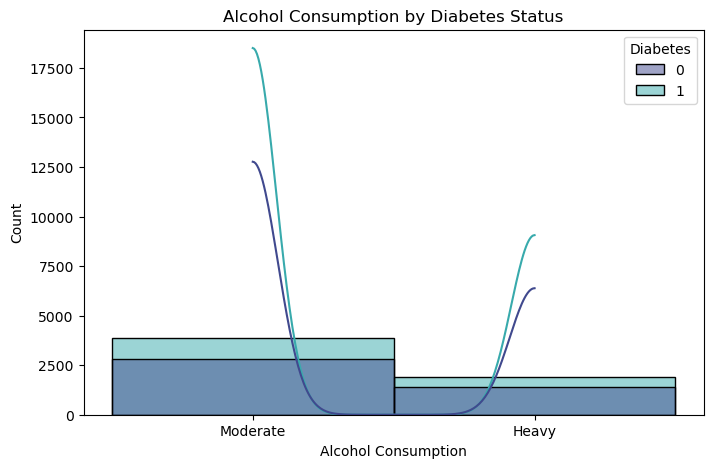

In [59]:
# BMI distribution by diabetes status
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="BMI", hue="Diabetes", kde=True, palette="Set2")
plt.title("BMI Distribution by Diabetes Status")
plt.show()

# Family history impact on diabetes
plt.figure(figsize=(6,4))
sns.barplot(x="Family_History_of_Diabetes", y="Diabetes", data=df)
plt.title("Family History vs Diabetes Rate")
plt.show()

# Blood Glucose levels vs Diabetes
plt.figure(figsize=(8,5))
sns.boxplot(x="Diabetes", y="Fasting_Blood_Glucose", data=df, palette="pastel")
plt.title("Fasting Blood Glucose vs Diabetes")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Fasting Blood Glucose")
plt.show()

# Smoking Status vs Diabeyes Distribution
plt.figure(figsize=(8,5))
sns.countplot(x="Smoking_Status", hue="Diabetes", data=df, palette="coolwarm")
plt.title("Smoking Status vs Diabetes")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Alcohol Consumption vs Diabetes
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Alcohol_Consumption", hue="Diabetes", kde=True, palette="mako")
plt.title("Alcohol Consumption by Diabetes Status")
plt.xlabel("Alcohol Consumption")
plt.ylabel("Count")
plt.show()

In [43]:
df.describe

<bound method NDFrame.describe of       Age     Sex Ethnicity   BMI  Waist_Circumference  Fasting_Blood_Glucose  \
0      58  Female     White  35.8                 83.4                  123.9   
1      48    Male     Asian  24.1                 71.4                  183.7   
2      34  Female     Black  25.0                113.8                  142.0   
3      62    Male     Asian  32.7                100.4                  167.4   
4      27  Female     Asian  33.5                110.8                  146.4   
...   ...     ...       ...   ...                  ...                    ...   
9995   45  Female     Asian  39.4                114.0                   76.2   
9996   41  Female     Asian  21.0                 71.3                   77.1   
9997   50  Female     Asian  29.0                106.3                   97.5   
9998   62  Female     White  27.3                119.9                   89.0   
9999   29    Male     Black  20.6                102.0                   70

In [39]:
# Label Encoding for categorical variables
le = LabelEncoder()
X = df.drop("Diabetes", axis=1)  # Features
y = df["Diabetes"]               # Target

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Accuracy: 0.9955
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       857
           1       0.99      1.00      1.00      1143

    accuracy                           1.00      2000
   macro avg       1.00      0.99      1.00      2000
weighted avg       1.00      1.00      1.00      2000



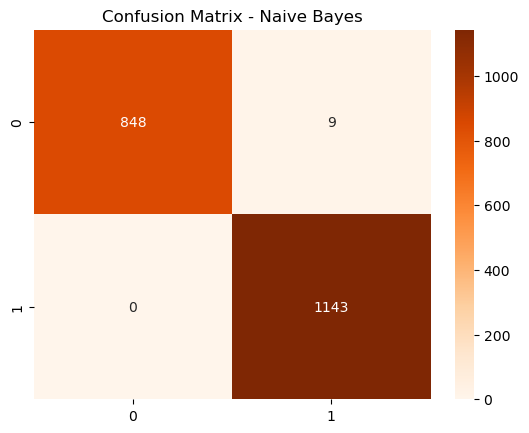

In [41]:
# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


Accuracy: 0.996
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       857
           1       1.00      1.00      1.00      1143

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



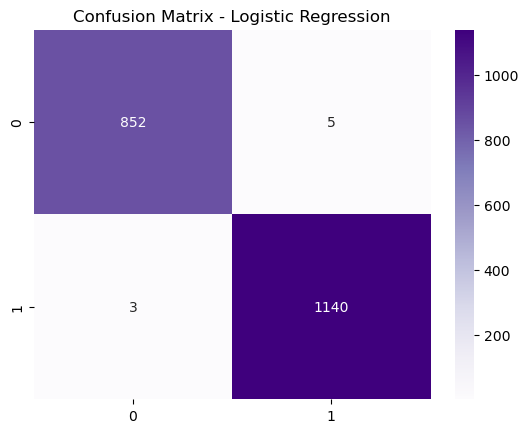

In [47]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       857
           1       1.00      1.00      1.00      1143

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



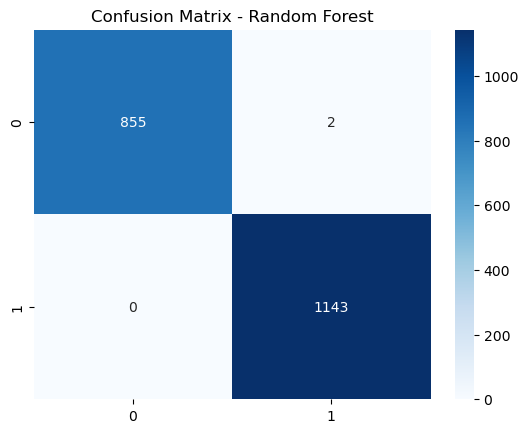

In [51]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       857
           1       1.00      1.00      1.00      1143

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



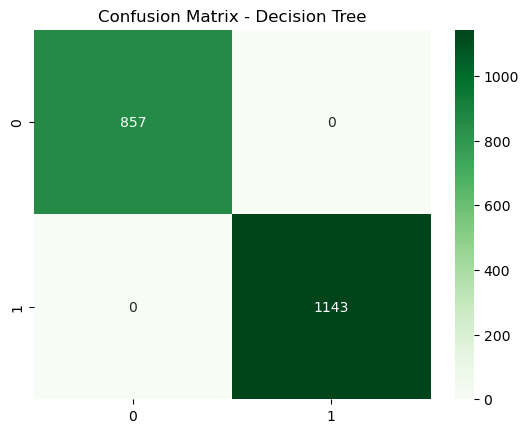

In [53]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.show()
